In [161]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingCVClassifier
from itertools import cycle
import warnings
import lightgbm as lgb
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [94]:
zip_file_path = 'Dutch_data_processed.zip'
csv_file_inside_zip = 'Dutch_data_processed.csv'

In [95]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [96]:
warnings.filterwarnings("ignore")

In [97]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Mode,Depart_time,Distance_in_kms
0,1,4,1,42,0,5,1,1,0,0,...,6,0,0,5,4,4,15,0,10.30,6.0
1,1,4,1,42,0,5,1,1,0,0,...,6,0,0,5,4,4,10,0,11.15,6.0
2,1,4,1,42,0,5,1,1,0,0,...,6,0,0,8,4,4,5,1,15.55,1.0
3,1,4,1,42,0,5,1,1,0,0,...,6,0,0,8,4,4,5,1,18.30,1.0
4,2,0,1,42,0,5,1,1,0,0,...,5,0,0,5,4,4,10,0,9.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802562,3,6,0,49,1,7,1,1,0,0,...,4,0,0,1,7,7,35,0,15.56,11.0
802563,3,6,0,49,1,7,1,1,0,0,...,4,0,0,5,7,7,7,2,16.50,1.1
802564,3,6,0,49,1,7,1,1,0,0,...,4,0,0,5,7,7,5,2,17.15,0.6
802565,3,6,0,49,1,7,1,1,0,0,...,4,0,0,6,7,7,15,0,18.20,6.3


In [56]:
drops = ["Mode", "Year"]
X = df.drop(drops, axis=1)

<Axes: >

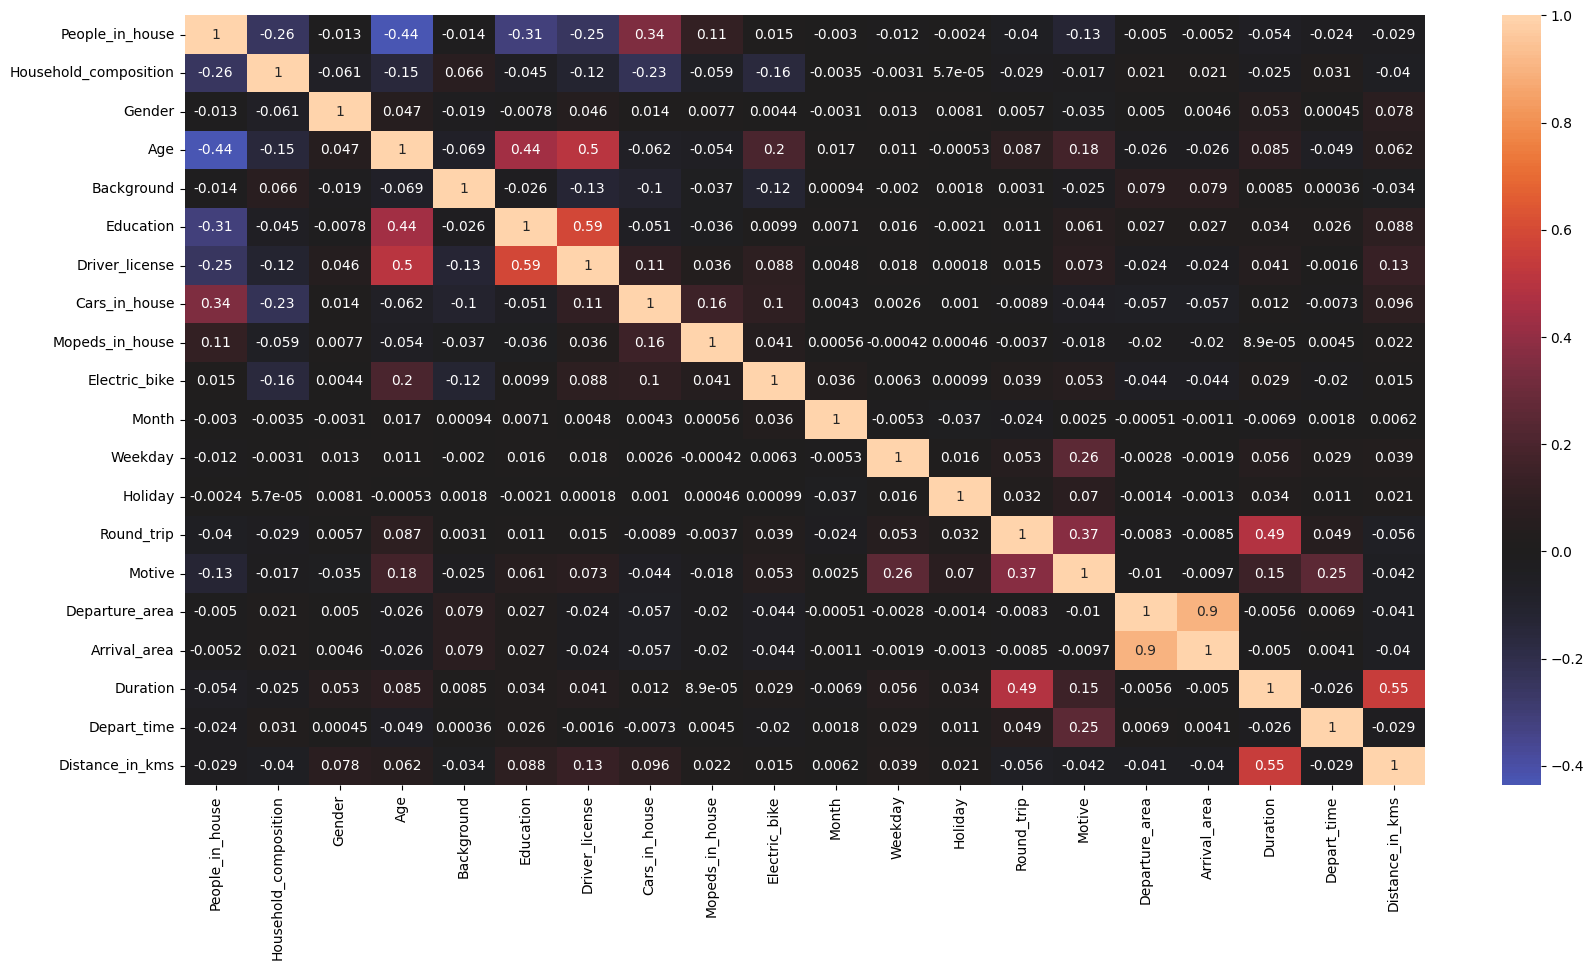

In [57]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

We will remove Arrival_area, due to high correlation with Departure_area

In [98]:
drops = ["Mode", "Arrival_area", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [99]:
X

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Duration,Depart_time,Distance_in_kms
0,1,4,1,42,0,5,1,1,0,0,1,6,0,0,5,4,15,10.30,6.0
1,1,4,1,42,0,5,1,1,0,0,1,6,0,0,5,4,10,11.15,6.0
2,1,4,1,42,0,5,1,1,0,0,1,6,0,0,8,4,5,15.55,1.0
3,1,4,1,42,0,5,1,1,0,0,1,6,0,0,8,4,5,18.30,1.0
4,2,0,1,42,0,5,1,1,0,0,1,5,0,0,5,4,10,9.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802562,3,6,0,49,1,7,1,1,0,0,12,4,0,0,1,7,35,15.56,11.0
802563,3,6,0,49,1,7,1,1,0,0,12,4,0,0,5,7,7,16.50,1.1
802564,3,6,0,49,1,7,1,1,0,0,12,4,0,0,5,7,5,17.15,0.6
802565,3,6,0,49,1,7,1,1,0,0,12,4,0,0,6,7,15,18.20,6.3


In [100]:
X, y = shuffle(X, y, random_state=42)

In [101]:
X

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Duration,Depart_time,Distance_in_kms
710200,4,1,1,65,0,6,1,0,0,1,11,4,0,1,7,10,60,14.30,10.0
97996,2,0,0,72,0,5,1,1,0,1,8,1,0,0,5,6,15,10.00,3.0
104069,2,0,0,25,0,5,1,1,2,0,8,1,0,0,5,0,30,17.10,32.0
400384,2,6,0,59,0,7,1,0,0,0,9,2,0,0,2,11,15,17.30,2.0
681737,1,4,0,83,0,6,1,1,0,1,11,4,0,1,7,5,150,12.30,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,0,1,75,0,7,1,3,0,1,8,7,0,0,5,6,10,13.30,3.0
365838,4,1,0,57,0,7,1,2,0,0,3,1,0,1,7,6,45,13.00,4.0
131932,1,4,1,58,0,7,1,1,0,0,9,4,0,0,2,11,30,17.00,20.0
671155,5,1,1,35,0,7,1,2,0,1,9,3,0,0,5,1,5,17.15,2.1


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    207866
1    186723
2    159616
3     65150
4     22698
Name: count, dtype: int64

Class counts in y_test:
Mode
0    51967
1    46681
2    39904
3    16288
4     5674
Name: count, dtype: int64


In [105]:
perc=y_train.value_counts(True)*100
print(perc)

Mode
0    32.375209
1    29.082179
2    24.860253
3    10.147137
4     3.535222
Name: proportion, dtype: float64


In [106]:
undersampler = RandomUnderSampler(sampling_strategy={0: 70000}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [107]:
undersampler = RandomUnderSampler(sampling_strategy={1: 70000}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [108]:
undersampler = RandomUnderSampler(sampling_strategy={2: 70000}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [109]:
oversampler = SMOTE(sampling_strategy={4: 60000}, random_state=1)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [110]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

Class counts in y_train:
Mode
0    70000
1    70000
2    70000
3    65150
4    60000
Name: count, dtype: int64


In [19]:
X_train.shape

(335150, 19)

# Dummy Classifier

In [39]:
dummy_classifier = DummyClassifier(strategy='uniform')
dummy_classifier.fit(X_train, y_train)
dummy_predictions = dummy_classifier.predict(X_test)
Dummy_Report = classification_report(y_test, dummy_predictions)
print('dum_Report:', Dummy_Report, sep='\n')

dum_Report:
              precision    recall  f1-score   support

           0       0.32      0.20      0.24     51967
           1       0.29      0.20      0.24     46681
           2       0.24      0.20      0.22     39904
           3       0.10      0.20      0.13     16288
           4       0.04      0.21      0.06      5674

    accuracy                           0.20    160514
   macro avg       0.20      0.20      0.18    160514
weighted avg       0.26      0.20      0.22    160514



# Logistic Regression

In [59]:
log_reg=LogisticRegression(random_state=42)

In [60]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear'],
              'max_iter': [100, 200, 300]}

In [61]:
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)

In [62]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1_macro')

In [63]:
log_params = grid_search_log.best_params_
print(log_params)

{'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}


In [162]:
logreg_model=LogisticRegression(C=10, max_iter=100, solver='lbfgs', random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42)

In [163]:
y_pred_log = logreg_model.predict(X_test)

In [164]:
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74     51967
           1       0.62      0.45      0.52     46681
           2       0.71      0.88      0.79     39904
           3       0.48      0.49      0.49     16288
           4       0.20      0.48      0.28      5674

    accuracy                           0.64    160514
   macro avg       0.56      0.60      0.56    160514
weighted avg       0.67      0.64      0.65    160514



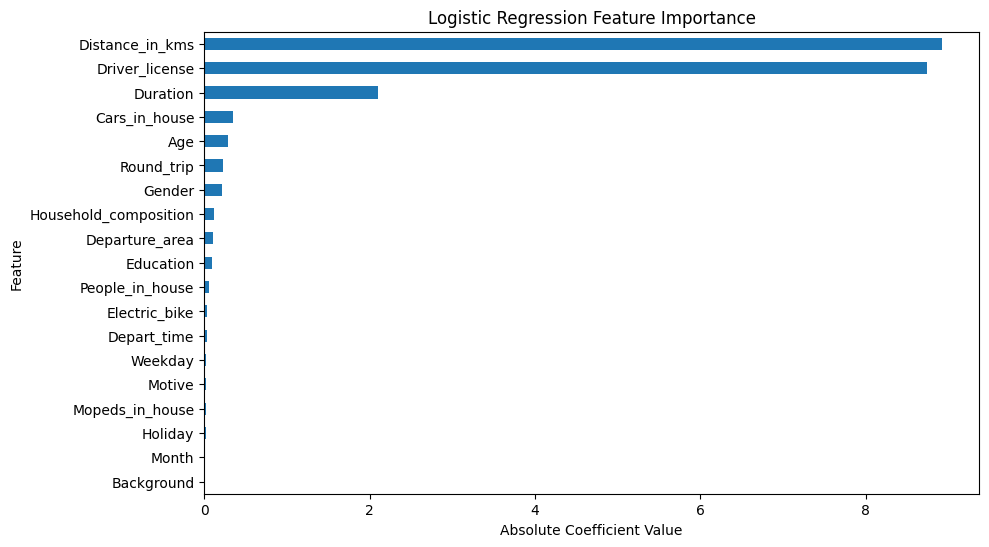

In [165]:
coefficients = pd.Series(logreg_model.coef_[0], index=X.columns)

sorted_coefficients = coefficients.abs().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='barh')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [166]:
print(sorted_coefficients)

Background               0.006391
Month                    0.011705
Holiday                  0.016541
Mopeds_in_house          0.018472
Motive                   0.021210
Weekday                  0.026809
Depart_time              0.038056
Electric_bike            0.039928
People_in_house          0.059057
Education                0.091659
Departure_area           0.111023
Household_composition    0.117208
Gender                   0.215894
Round_trip               0.230531
Age                      0.291725
Cars_in_house            0.342996
Duration                 2.096281
Driver_license           8.738245
Distance_in_kms          8.925277
dtype: float64


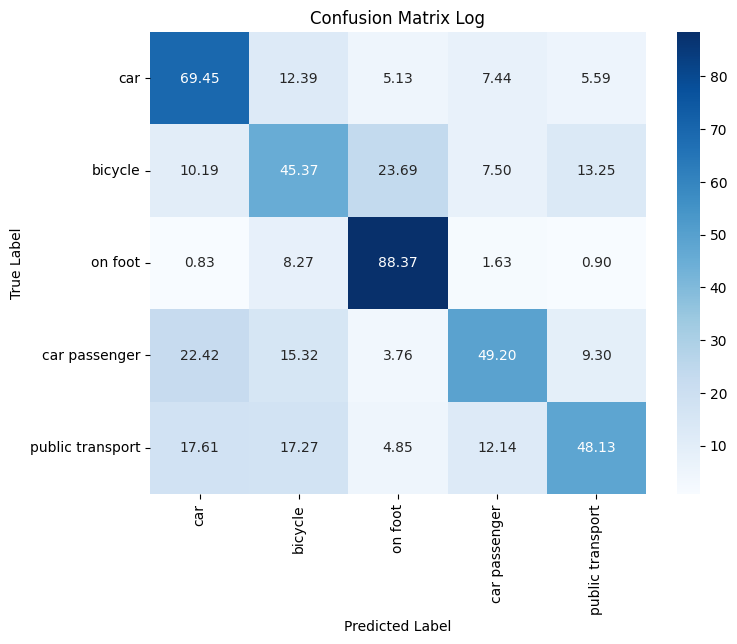

In [167]:
class_labels = ["car", "bicycle", "on foot", "car passenger", "public transport"]

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Log')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [168]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)

In [169]:
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")

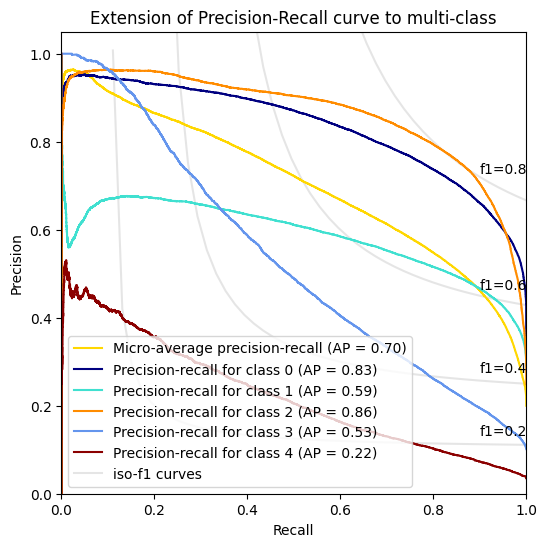

In [170]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "darkred"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# Decision Tree

In [21]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
max_depth = dt_model.tree_.max_depth
max_depth

43

In [22]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.71     51967
           1       0.65      0.57      0.61     46681
           2       0.79      0.80      0.79     39904
           3       0.41      0.66      0.51     16288
           4       0.27      0.53      0.36      5674

    accuracy                           0.66    160514
   macro avg       0.58      0.64      0.59    160514
weighted avg       0.69      0.66      0.67    160514



In [23]:
param_grid = {
    'max_depth': list(range(2, 44))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...]},
             scoring='f1_macro')

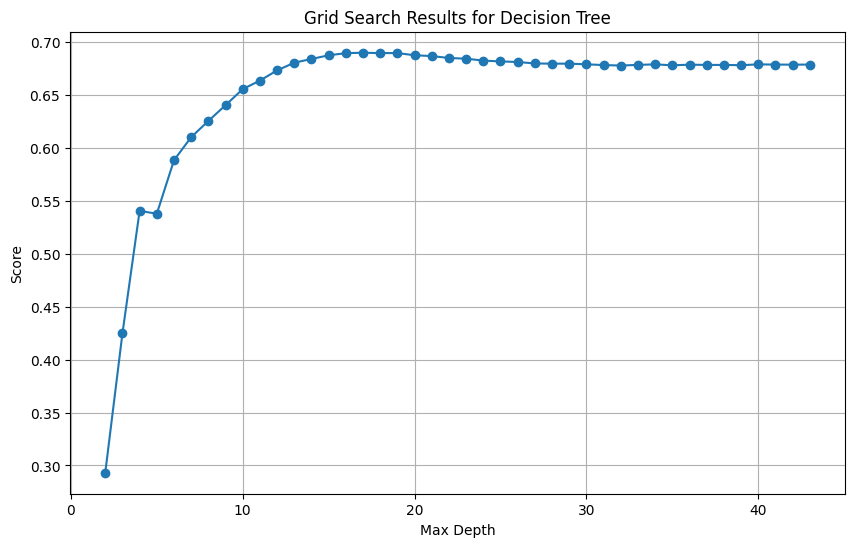

In [24]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Pruned Tree

In [131]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=16)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=42)

In [132]:
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74     51967
           1       0.63      0.62      0.63     46681
           2       0.81      0.82      0.81     39904
           3       0.49      0.59      0.54     16288
           4       0.29      0.54      0.38      5674

    accuracy                           0.68    160514
   macro avg       0.61      0.65      0.62    160514
weighted avg       0.71      0.68      0.69    160514



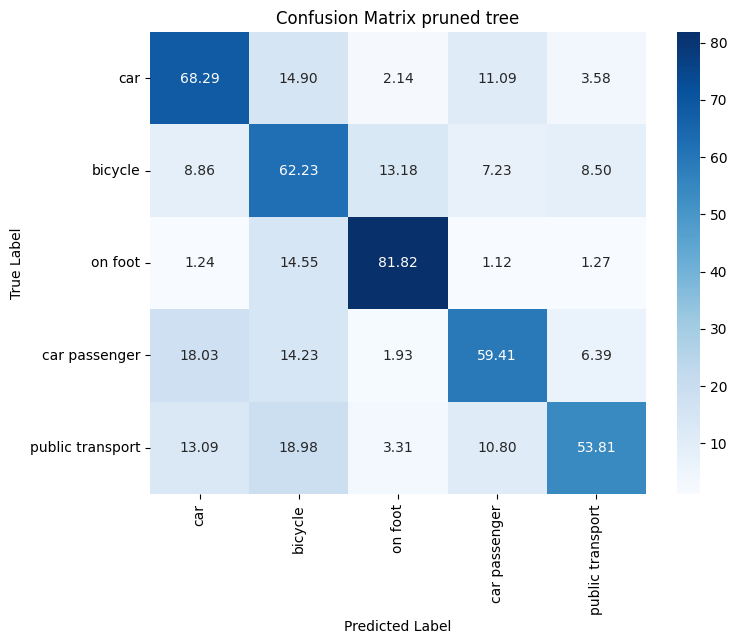

In [133]:
class_labels = ["car", "bicycle", "on foot", "car passenger", "public transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
X.columns

Index(['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms'],
      dtype='object')

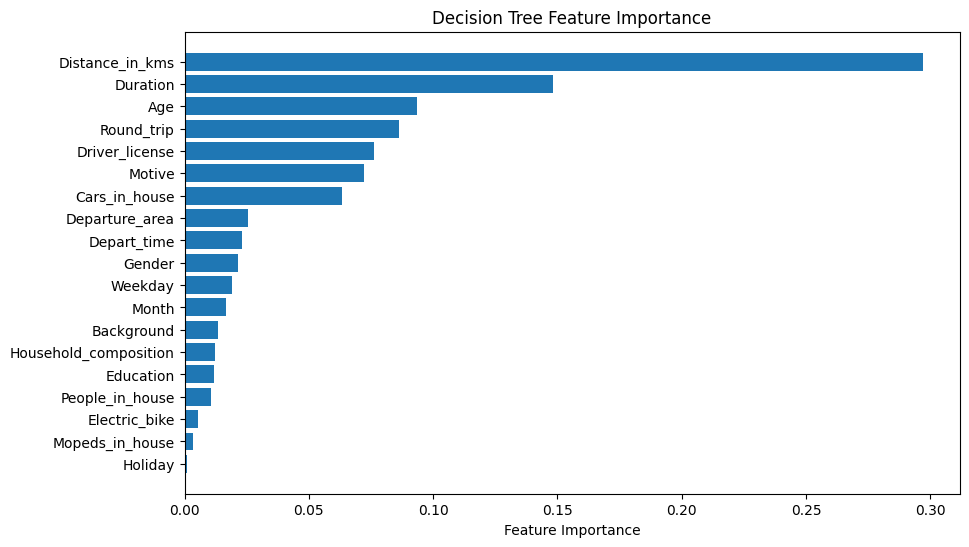

In [29]:
feature_importances = tree.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

In [30]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)

In [31]:
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(tree.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")

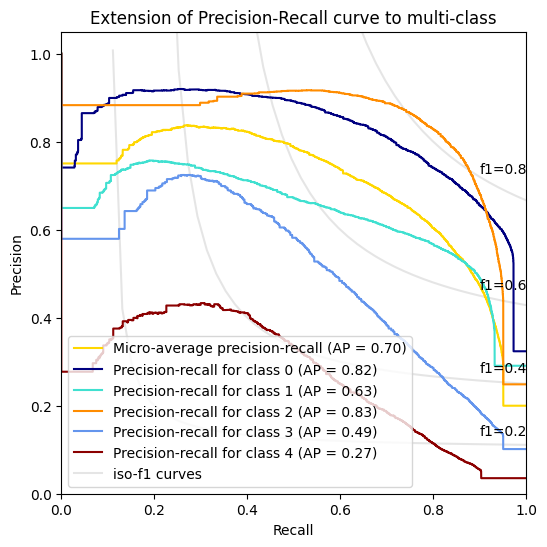

In [32]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "darkred"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(tree.classes_)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# BAGGING

In [44]:
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_classifier)

In [45]:
param_grid = {
    'n_estimators': [100,200,300,400]}

In [46]:
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42)),
             param_grid={'n_estimators': [100, 200, 300, 400]},
             scoring='f1_macro')

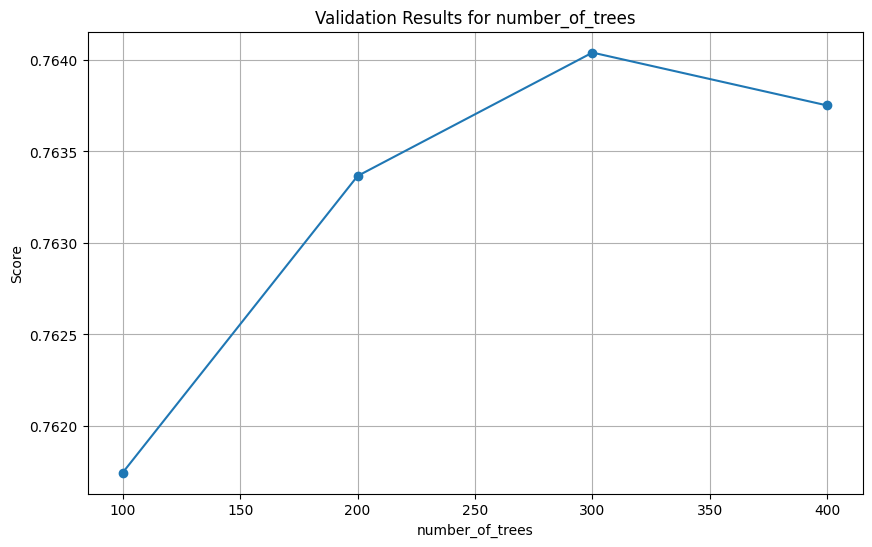

In [47]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [41]:
param_grid = {
    'max_samples': [0.6, 0.7,0.8,0.9]}

In [42]:
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42)),
             param_grid={'max_samples': [0.6, 0.7, 0.8, 0.9]},
             scoring='f1_macro')

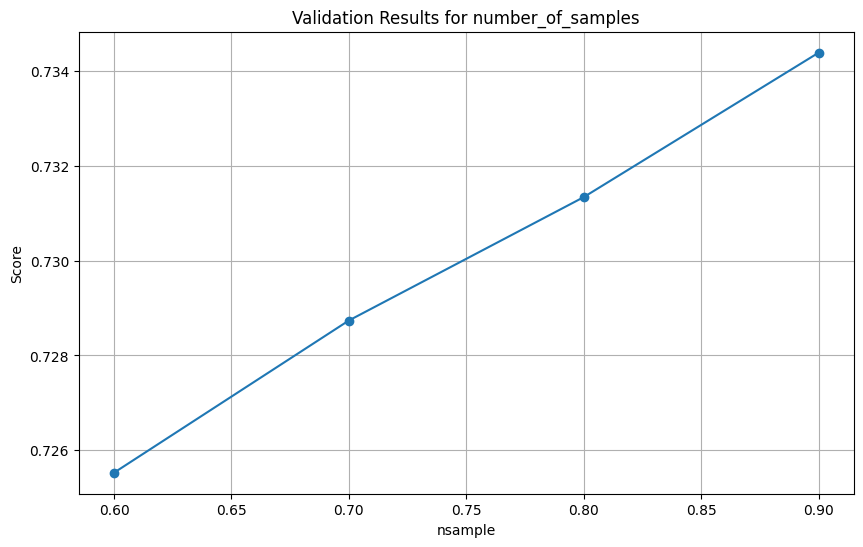

In [43]:
sample = grid_search.cv_results_['param_max_samples']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(sample, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('nsample')
plt.ylabel('Score')
plt.title('Validation Results for number_of_samples')
plt.grid(True)
plt.show()

In [48]:
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_classifier, max_samples=0.9, n_estimators=300)

In [49]:
bagging_classifier.fit(X_train, y_train)
y_pred_bag=bagging_classifier.predict(X_test)
bagreport = classification_report(y_test, y_pred_bag)
print(bagreport)

              precision    recall  f1-score   support

           0       0.85      0.76      0.80     51967
           1       0.73      0.70      0.71     46681
           2       0.83      0.88      0.85     39904
           3       0.59      0.71      0.65     16288
           4       0.43      0.59      0.50      5674

    accuracy                           0.76    160514
   macro avg       0.69      0.73      0.70    160514
weighted avg       0.77      0.76      0.76    160514



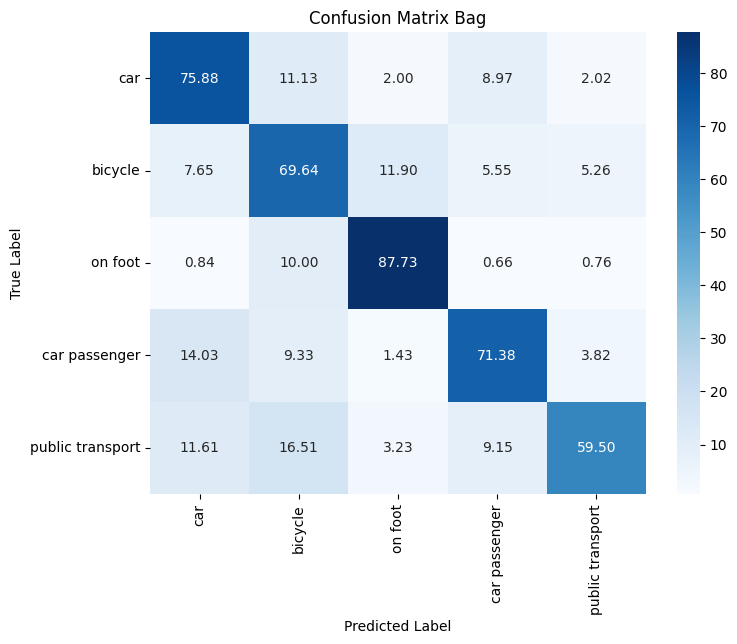

In [50]:
class_labels = ["car", "bicycle", "on foot", "car passenger", "public transport"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_bag) / conf_matrix_bag.sum(axis=1)
conf_matrix_percentages_bag = (conf_matrix_bag.T / conf_matrix_bag.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_bag, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Bag')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest

In [18]:
X_train.shape

(335150, 19)

In [52]:
param_grid = {
    'max_features': range(2, 20)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

KeyboardInterrupt: 

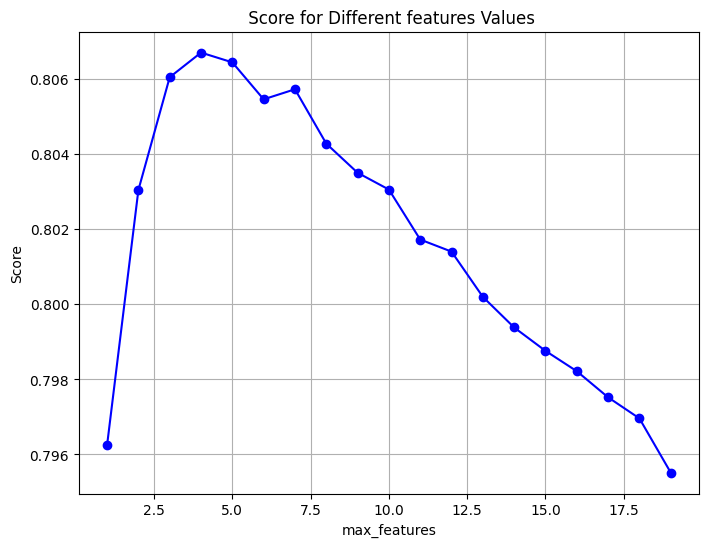

In [21]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [22]:
param_grid = {
    'n_estimators' : [50, 100, 200, 300, 400]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 400}


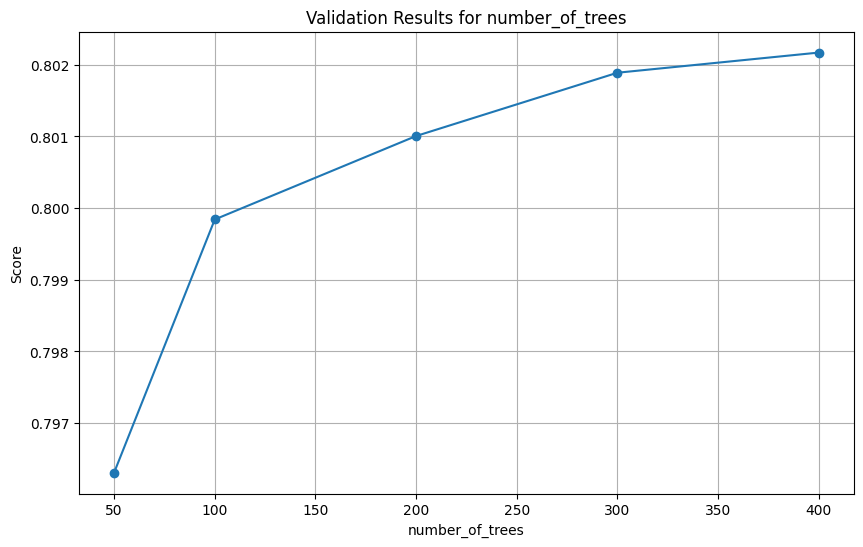

In [23]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [24]:
param_grid = {
    'n_estimators' : [350, 400, 450],
    'max_features' : [3, 4, 5]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 4, 'n_estimators': 450}


In [21]:
random_forest = RandomForestClassifier(random_state=42, max_features=4, n_estimators=450)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=450, random_state=42)

In [22]:
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82     51967
           1       0.75      0.69      0.72     46681
           2       0.83      0.89      0.86     39904
           3       0.62      0.75      0.68     16288
           4       0.50      0.64      0.56      5674

    accuracy                           0.78    160514
   macro avg       0.71      0.75      0.73    160514
weighted avg       0.78      0.78      0.78    160514



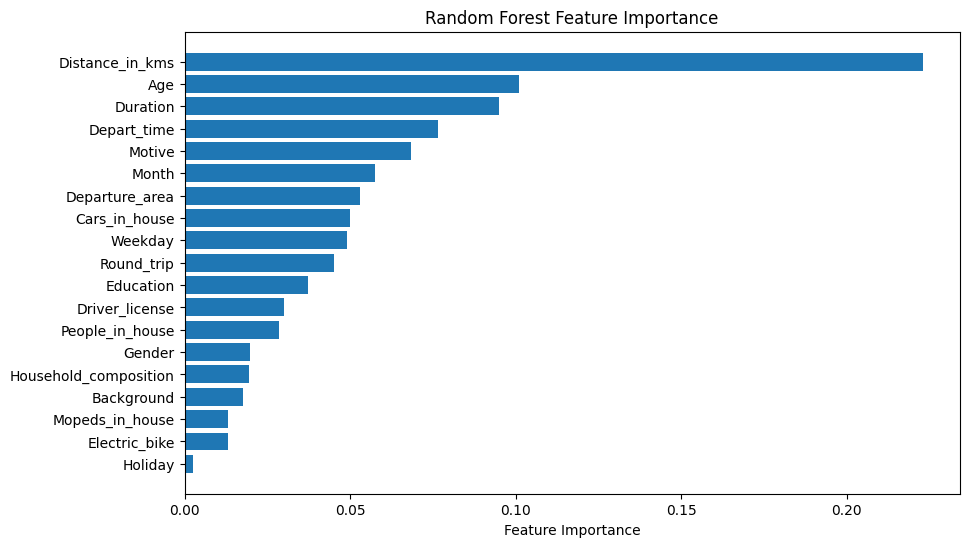

In [23]:
feature_importances = random_forest.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

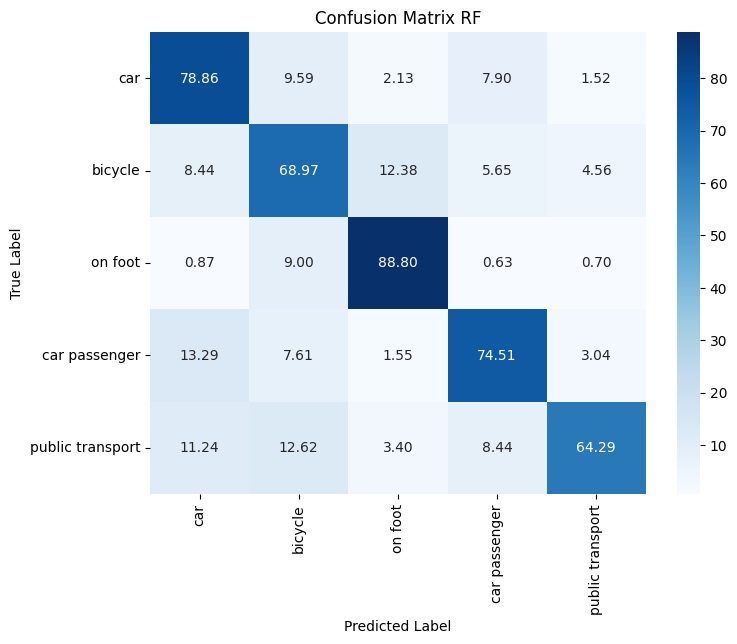

In [24]:
class_labels = ["car", "bicycle", "on foot", "car passenger", "public transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)

In [26]:
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(random_forest.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")

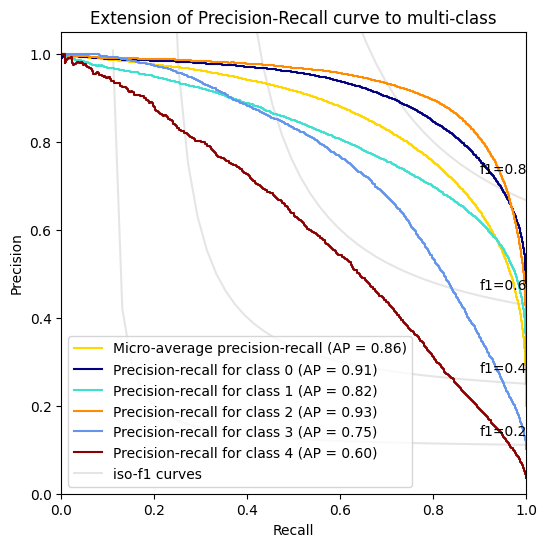

In [27]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "darkred"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# AdaBoost

Adaboost requires small tree depth so we will use a max depth of 7

In [33]:
weak_learner = DecisionTreeClassifier(max_depth=7)
adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner,
    algorithm="SAMME",
    random_state=42)

In [32]:
param_grid = {
    'n_estimators': [100, 200, 300, 400]}

In [33]:
grid_search = GridSearchCV(adaboost_clf, param_grid, cv=5, scoring="f1_macro")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=7),
                                          random_state=42),
             param_grid={'n_estimators': [100, 200, 300, 400]},
             scoring='f1_macro')

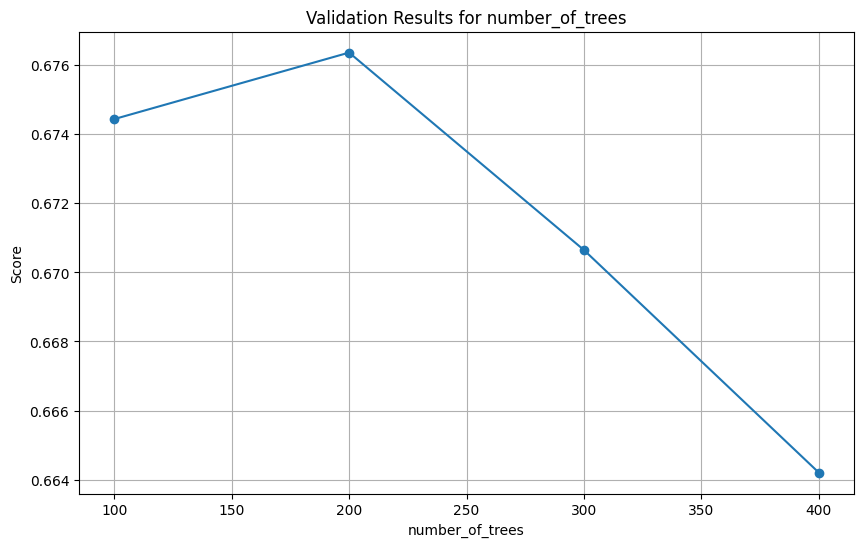

In [34]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [34]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]}

In [35]:
grid_search = GridSearchCV(adaboost_clf, param_grid, cv=5, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

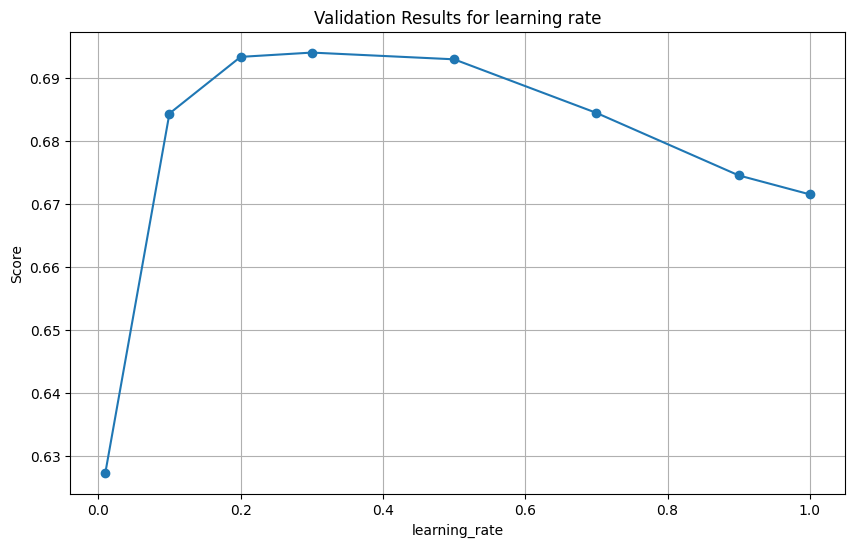

In [36]:
Learning_rate = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(Learning_rate, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('Validation Results for learning rate')
plt.grid(True)
plt.show()

In [39]:
param_grid = {
    'learning_rate': [0.2, 0.3, 0.4],
    'n_estimators': [150, 200]}

In [40]:
grid_search = GridSearchCV(adaboost_clf, param_grid, cv=5, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [41]:
print(best_params)

{'learning_rate': 0.2, 'n_estimators': 200}


In [42]:
weak_learner = DecisionTreeClassifier(max_depth=7)
adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner,
    algorithm="SAMME",
    n_estimators=200,
    learning_rate=0.2,
    random_state=42)

In [43]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=7),
                   learning_rate=0.2, n_estimators=200, random_state=42)

In [44]:
y_pred_ada=adaboost_clf.predict(X_test)
adareport = classification_report(y_test, y_pred_ada)
print(adareport)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76     51967
           1       0.66      0.63      0.64     46681
           2       0.80      0.86      0.83     39904
           3       0.52      0.58      0.55     16288
           4       0.35      0.56      0.43      5674

    accuracy                           0.71    160514
   macro avg       0.63      0.67      0.64    160514
weighted avg       0.72      0.71      0.71    160514



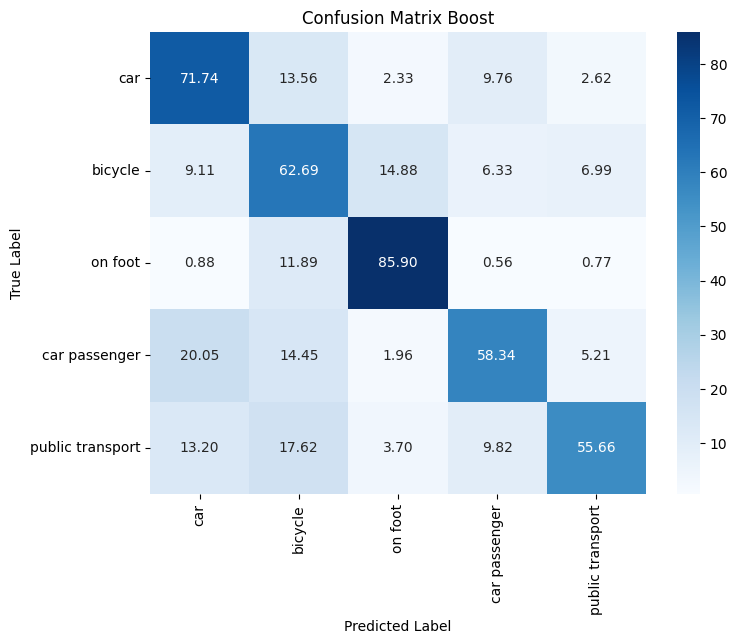

In [45]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_ada) / conf_matrix_ada.sum(axis=1)
conf_matrix_percentages_ada = (conf_matrix_ada.T / conf_matrix_ada.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_ada, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
class_probabilities_ada = adaboost_clf.predict_proba(X_test)
y_pred_prob_ada = np.argmax(class_probabilities_ada, axis=1)

In [47]:
y_test_bin_ada = label_binarize(y_test, classes=adaboost_clf.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(adaboost_clf.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_ada[:, i], class_probabilities_ada[:, i])
    average_precision[i] = average_precision_score(y_test_bin_ada[:, i], class_probabilities_ada[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_ada.ravel(), class_probabilities_ada.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_ada, class_probabilities_ada, average="micro")

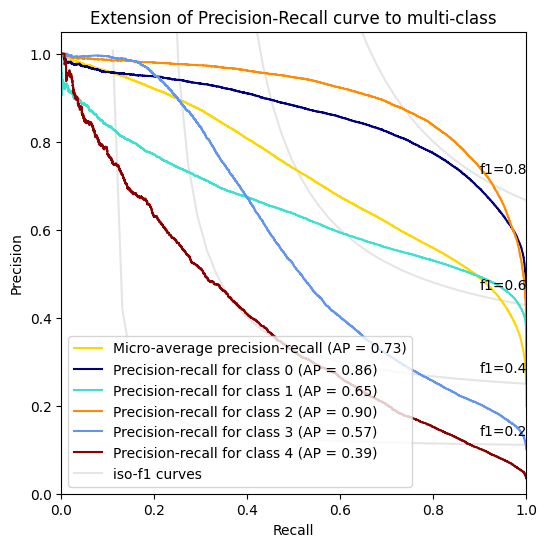

In [49]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "darkred"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# XGBoost

In [111]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)

In [112]:
param_grid = {
    'n_estimators': [100, 200, 300, 400]}

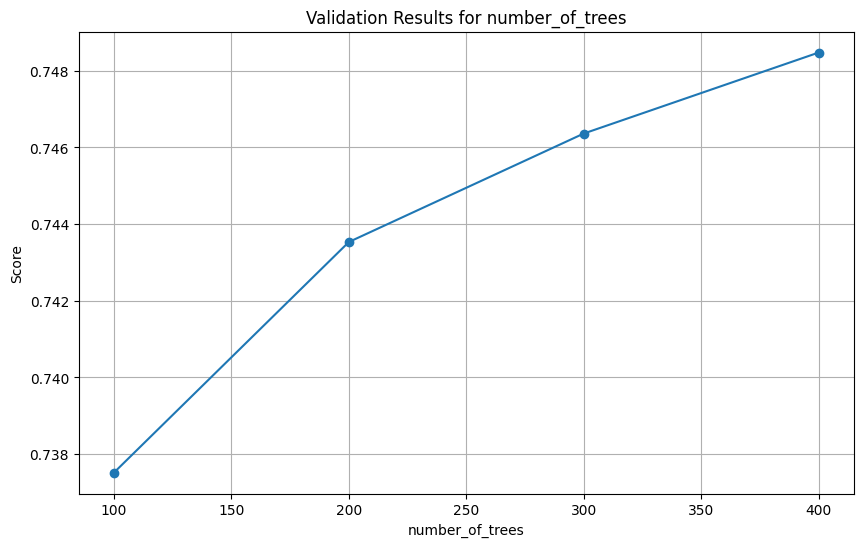

In [113]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, n_jobs=-1, scoring="f1_macro")
grid_search.fit(X_train, y_train)
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [115]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]}

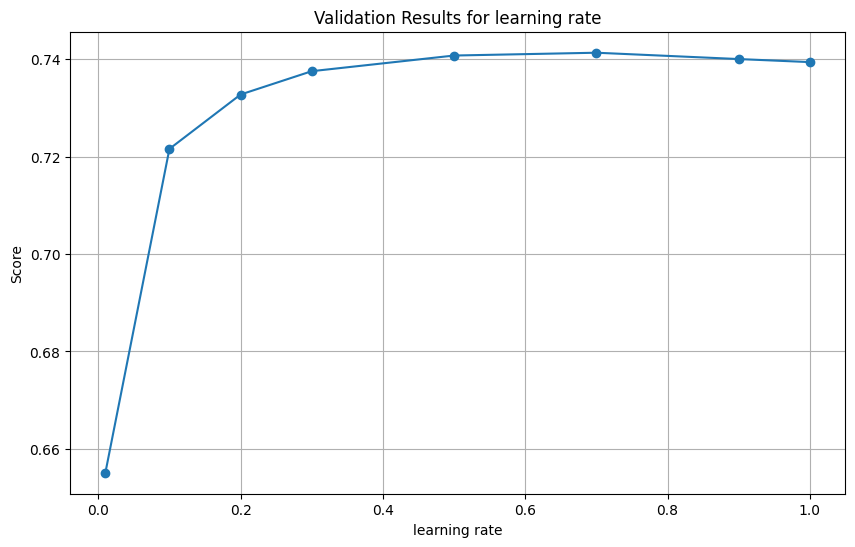

In [116]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, n_jobs=-1, scoring="f1_macro")
grid_search.fit(X_train, y_train)
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Results for learning rate')
plt.grid(True)
plt.show()

In [117]:
param_grid = {
    'subsample': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]}

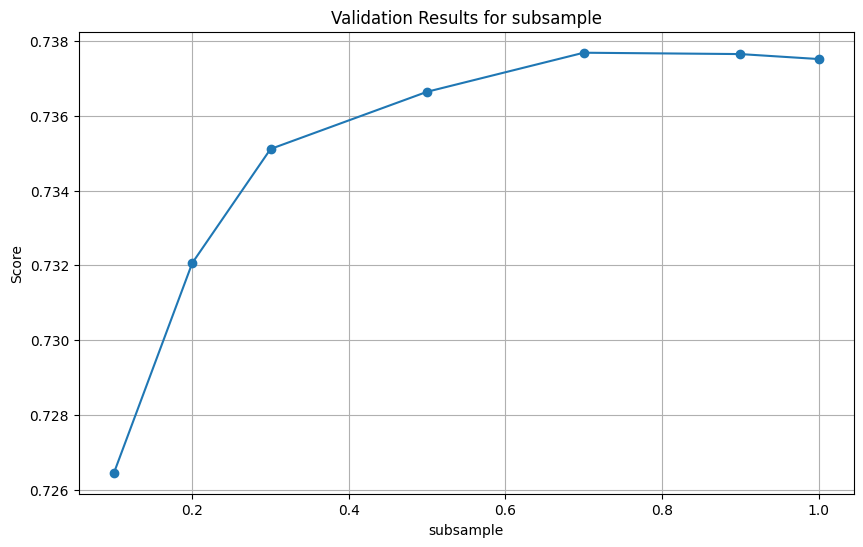

In [118]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, n_jobs=-1, scoring="f1_macro")
grid_search.fit(X_train, y_train)
number_of_trees = grid_search.cv_results_['param_subsample']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.title('Validation Results for subsample')
plt.grid(True)
plt.show()

In [121]:
param_grid = {
    'colsample_bytree': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]
}

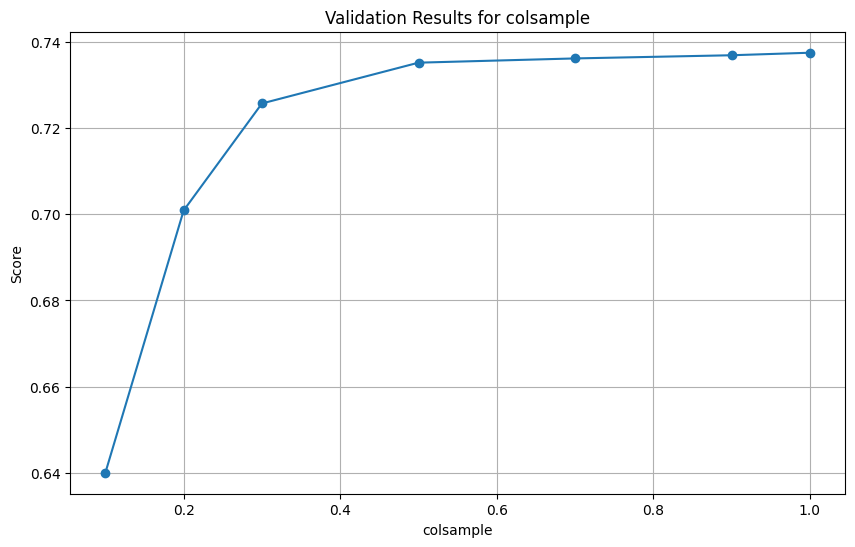

In [122]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, n_jobs=-1, scoring="f1_macro")
grid_search.fit(X_train, y_train)
number_of_trees = grid_search.cv_results_['param_colsample_bytree']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('colsample')
plt.ylabel('Score')
plt.title('Validation Results for colsample')
plt.grid(True)
plt.show()

In [123]:
param_grid = {
    'n_estimators': [400,450,500],
    'learning_rate': [0.6,0.7,0.8],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 0.1]
}

In [124]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, n_jobs=-1, scoring="f1_macro")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=5,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 0.1],
                         'learning_rate': [0.6, 0.7, 0.8],
                         'n_estimators': [400, 450, 500],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='f1_macro')

In [125]:
best_params = grid_search.best_params_
print(best_params)

{'colsample_bytree': 0.9, 'learning_rate': 0.6, 'n_estimators': 500, 'subsample': 0.9}


In [127]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42, 
                                  colsample_bytree= 0.9, learning_rate= 0.6, n_estimators= 500, subsample= 0.9)

In [128]:
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.83      0.74      0.78     51967
           1       0.71      0.69      0.70     46681
           2       0.82      0.85      0.84     39904
           3       0.53      0.67      0.59     16288
           4       0.48      0.57      0.52      5674

    accuracy                           0.74    160514
   macro avg       0.67      0.70      0.69    160514
weighted avg       0.75      0.74      0.74    160514



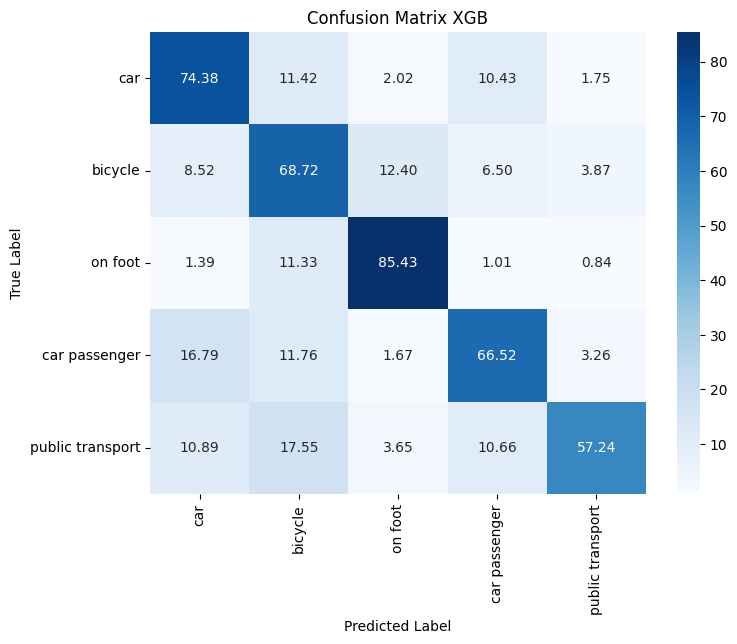

In [134]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

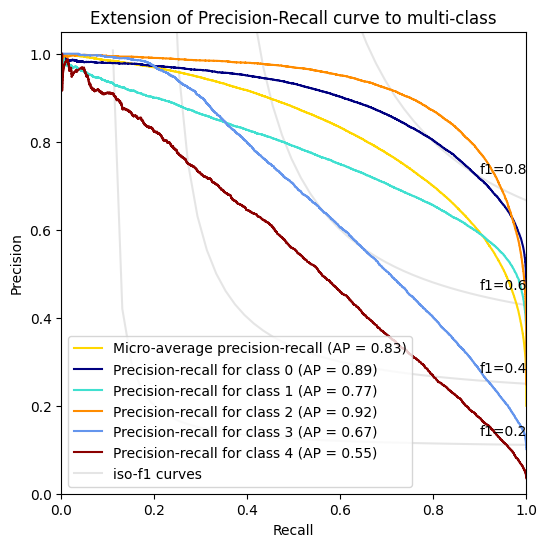

In [135]:
class_probabilities_xgb = xgb_classifier.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=xgb_classifier.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(xgb_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "darkred"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# LightGBM

In [136]:
lgb_classifier = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=5,
    verbosity=0,
    random_state=42
)

In [137]:
param_grid = {
     'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]}

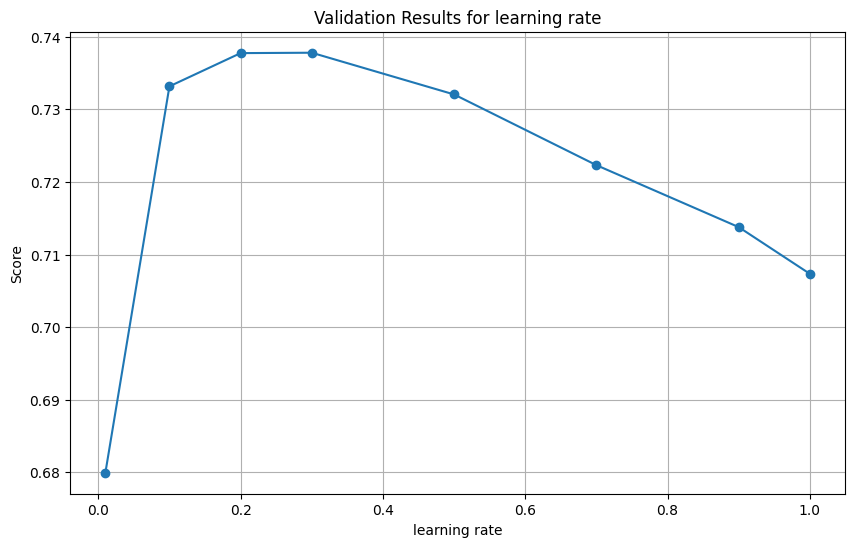

In [139]:
grid_search = GridSearchCV(lgb_classifier, param_grid, cv=5, n_jobs=-1, scoring="f1_macro")
grid_search.fit(X_train, y_train)
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Results for learning rate')
plt.grid(True)
plt.show()

In [141]:
param_grid = {
    'reg_lambda': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]}

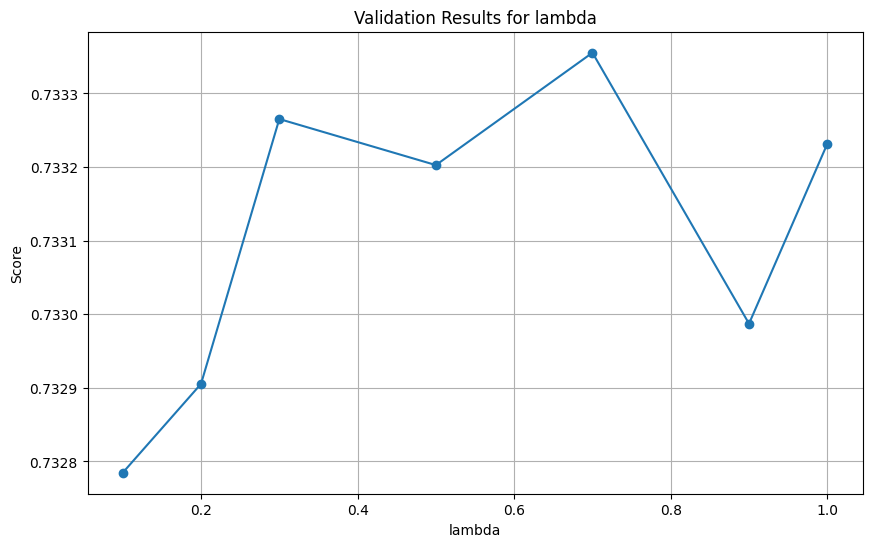

In [142]:
grid_search = GridSearchCV(lgb_classifier, param_grid, cv=5, n_jobs=-1, scoring="f1_macro")
grid_search.fit(X_train, y_train)
number_of_trees = grid_search.cv_results_['param_reg_lambda']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('lambda')
plt.ylabel('Score')
plt.title('Validation Results for lambda')
plt.grid(True)
plt.show()

In [143]:
param_grid = {
     'n_estimators': [100, 200, 300, 400, 450]}

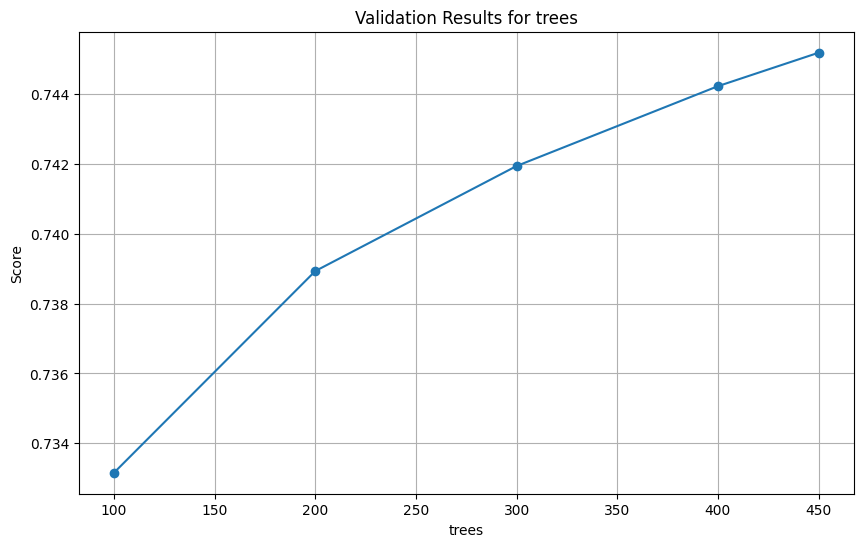

In [144]:
grid_search = GridSearchCV(lgb_classifier, param_grid, cv=5, n_jobs=-1, scoring="f1_macro")
grid_search.fit(X_train, y_train)
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('trees')
plt.ylabel('Score')
plt.title('Validation Results for trees')
plt.grid(True)
plt.show()

In [147]:
param_grid = {
    'learning_rate': [0.2, 0.3],
    'n_estimators': [450, 500, 550],
    'reg_lambda': [0.6, 0.7]
}

In [148]:
grid_search = GridSearchCV(lgb_classifier, param_grid, cv=5, n_jobs=-1, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.2, 'n_estimators': 550, 'reg_lambda': 0.6}


In [149]:
lgb_classifier = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=5,
    verbosity=0,
    random_state=42,
    learning_rate=0.2,
    n_estimators=550,
    reg_lambda=0.6
)

In [150]:
lgb_classifier.fit(X_train, y_train)
y_pred = lgb_classifier.predict(X_test)
lgbreport = classification_report(y_test, y_pred)
print(lgbreport)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79     51967
           1       0.70      0.70      0.70     46681
           2       0.82      0.86      0.84     39904
           3       0.55      0.66      0.60     16288
           4       0.50      0.56      0.53      5674

    accuracy                           0.75    160514
   macro avg       0.68      0.71      0.69    160514
weighted avg       0.75      0.75      0.75    160514



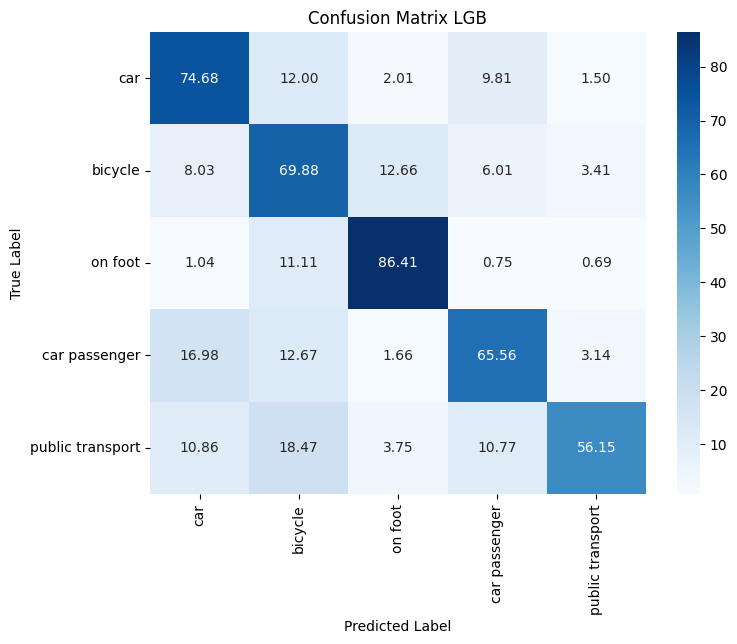

In [151]:
conf_matrix_lgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_lgb) / conf_matrix_lgb.sum(axis=1)
conf_matrix_percentages_lgb = (conf_matrix_lgb.T / conf_matrix_lgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_lgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix LGB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

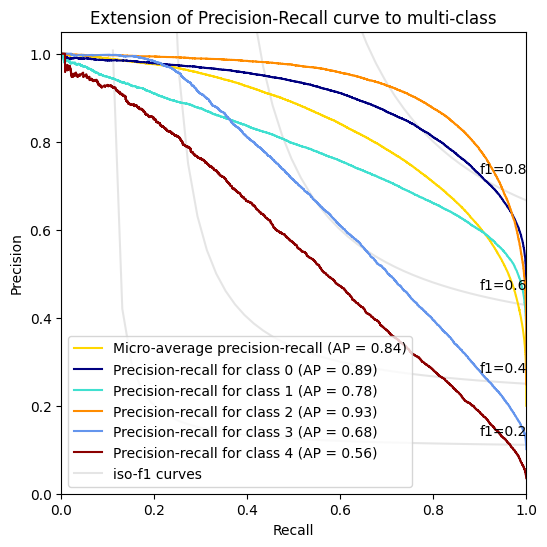

In [152]:
class_probabilities_lgb = lgb_classifier.predict_proba(X_test)
y_pred_prob_lgb = np.argmax(class_probabilities_lgb, axis=1)
y_test_bin_lgb = label_binarize(y_test, classes=lgb_classifier.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(lgb_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_lgb[:, i], class_probabilities_lgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_lgb[:, i], class_probabilities_lgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_lgb.ravel(), class_probabilities_lgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_lgb, class_probabilities_lgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "darkred"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# Stacked Model

In [165]:
base_model1 = RandomForestClassifier(random_state=42, max_features=4, n_estimators=450)
base_model2  = lgb_classifier = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=5,
    verbosity=0,
    random_state=42,
    learning_rate=0.2,
    n_estimators=550,
    reg_lambda=0.6)
base_model3 = DecisionTreeClassifier(random_state = 42, max_depth=16)

In [166]:
meta_model=LogisticRegression(C=10, max_iter=100, solver='lbfgs', random_state=42)

In [167]:
stacking_cv_classifier = StackingCVClassifier(
    classifiers=[base_model1, base_model2, base_model3],
    meta_classifier=meta_model,
    cv=5)

In [168]:
stacking_cv_classifier.fit(X_train, y_train)
y_pred_test = stacking_cv_classifier.predict(X_test)
stackreport = classification_report(y_test, y_pred_test)
print(stackreport)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80     51967
           1       0.71      0.64      0.67     46681
           2       0.79      0.85      0.82     39904
           3       0.56      0.68      0.62     16288
           4       0.57      0.57      0.57      5674

    accuracy                           0.74    160514
   macro avg       0.69      0.70      0.69    160514
weighted avg       0.74      0.74      0.74    160514



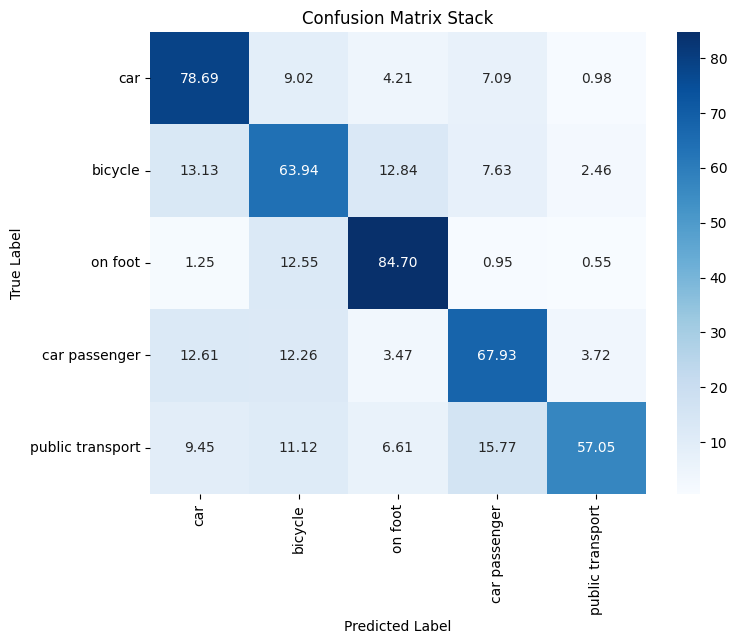

In [170]:
conf_matrix_stack = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_stack) / conf_matrix_stack.sum(axis=1)
conf_matrix_percentages_stack = (conf_matrix_stack.T / conf_matrix_stack.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_stack, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Stack')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Experimenting with 4 class labels
We will group car passenger and public transportation classes into one class which is Shared Transportation

In [177]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Mode,Depart_time,Distance_in_kms
0,1,4,1,42,0,5,1,1,0,0,...,6,0,0,5,4,4,15,0,10.30,6.0
1,1,4,1,42,0,5,1,1,0,0,...,6,0,0,5,4,4,10,0,11.15,6.0
2,1,4,1,42,0,5,1,1,0,0,...,6,0,0,8,4,4,5,1,15.55,1.0
3,1,4,1,42,0,5,1,1,0,0,...,6,0,0,8,4,4,5,1,18.30,1.0
4,2,0,1,42,0,5,1,1,0,0,...,5,0,0,5,4,4,10,0,9.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802562,3,6,0,49,1,7,1,1,0,0,...,4,0,0,1,7,7,35,0,15.56,11.0
802563,3,6,0,49,1,7,1,1,0,0,...,4,0,0,5,7,7,7,2,16.50,1.1
802564,3,6,0,49,1,7,1,1,0,0,...,4,0,0,5,7,7,5,2,17.15,0.6
802565,3,6,0,49,1,7,1,1,0,0,...,4,0,0,6,7,7,15,0,18.20,6.3


In [178]:
df['Mode'] = df['Mode'].map({0:0, 1:1, 2:2, 3:3, 4:3})

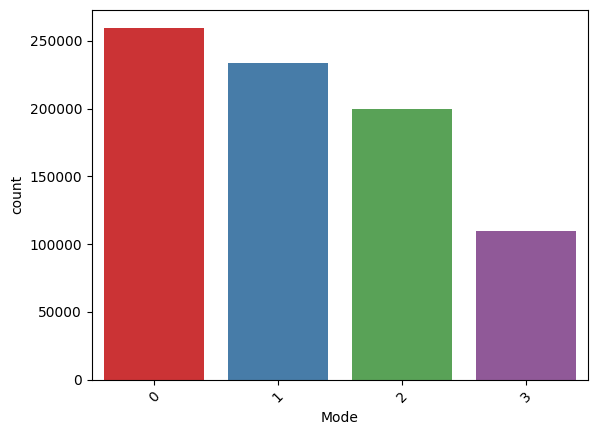

In [179]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.show()

In [53]:
drops = ["Mode", "Year"]
X = df.drop(drops, axis=1)

<Axes: >

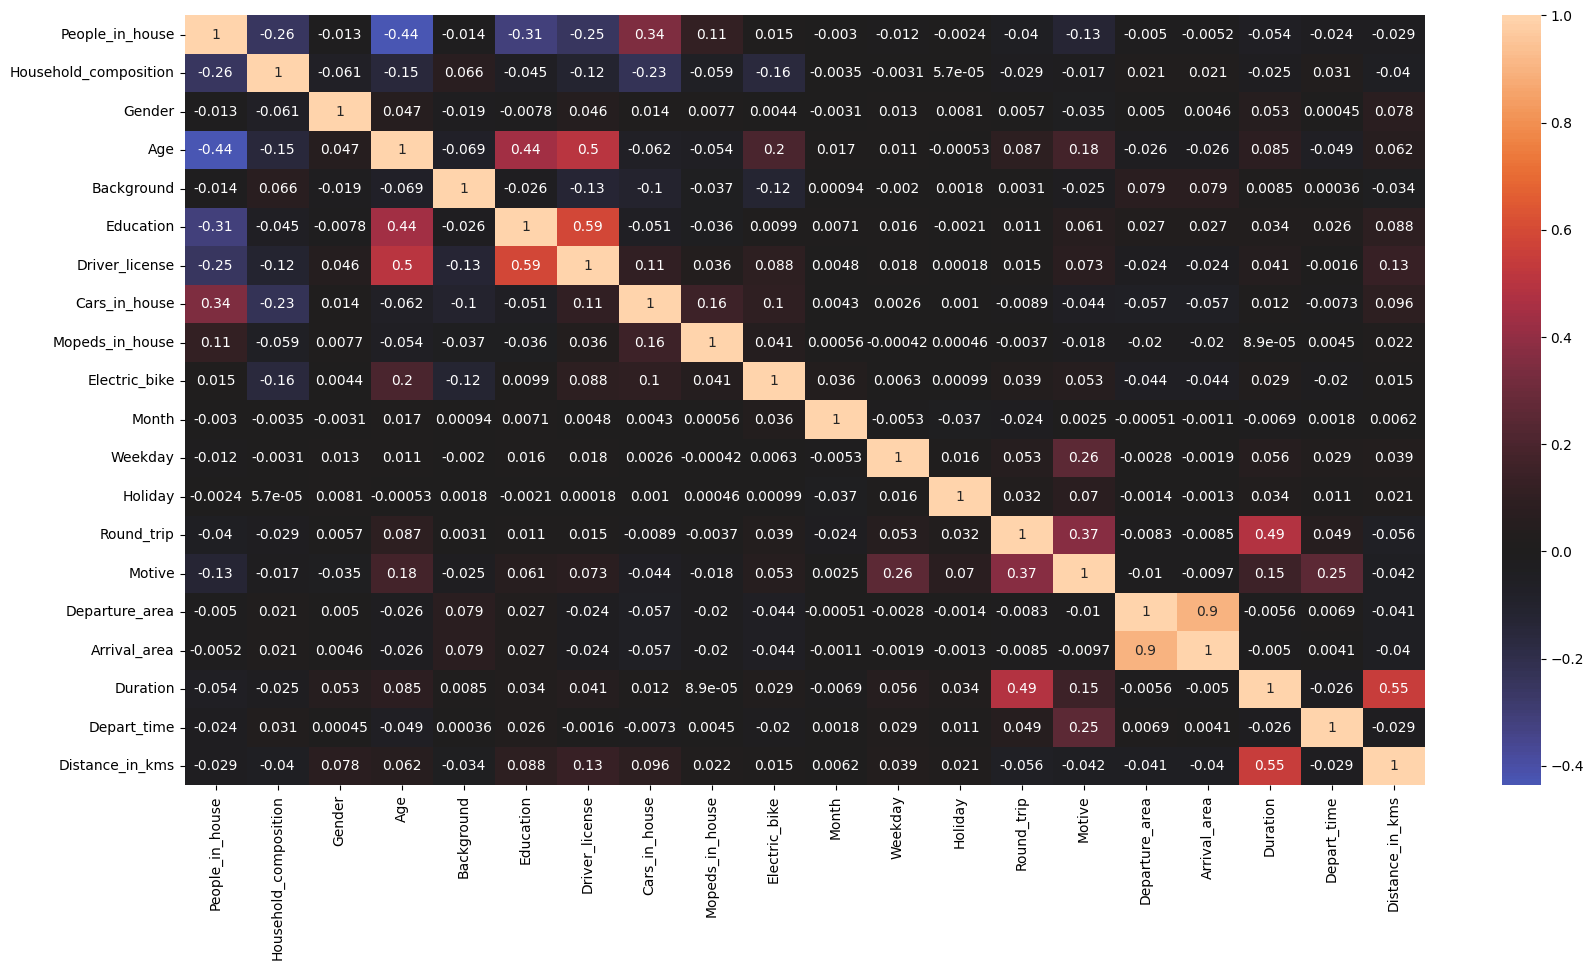

In [54]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [261]:
drops = ["Mode", "Arrival_area", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [262]:
X, y = shuffle(X, y, random_state=42)
X

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Duration,Depart_time,Distance_in_kms
710200,4,1,1,65,0,6,1,0,0,1,11,4,0,1,7,10,60,14.30,10.0
97996,2,0,0,72,0,5,1,1,0,1,8,1,0,0,5,6,15,10.00,3.0
104069,2,0,0,25,0,5,1,1,2,0,8,1,0,0,5,0,30,17.10,32.0
400384,2,6,0,59,0,7,1,0,0,0,9,2,0,0,2,11,15,17.30,2.0
681737,1,4,0,83,0,6,1,1,0,1,11,4,0,1,7,5,150,12.30,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,0,1,75,0,7,1,3,0,1,8,7,0,0,5,6,10,13.30,3.0
365838,4,1,0,57,0,7,1,2,0,0,3,1,0,1,7,6,45,13.00,4.0
131932,1,4,1,58,0,7,1,1,0,0,9,4,0,0,2,11,30,17.00,20.0
671155,5,1,1,35,0,7,1,2,0,1,9,3,0,0,5,1,5,17.15,2.1


In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [264]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [265]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    207866
1    186723
2    159616
3     87848
Name: count, dtype: int64

Class counts in y_test:
Mode
0    51967
1    46681
2    39904
3    21962
Name: count, dtype: int64


In [266]:
undersampler = RandomUnderSampler(sampling_strategy={0: 100000}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [267]:
undersampler = RandomUnderSampler(sampling_strategy={1: 100000}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [268]:
undersampler = RandomUnderSampler(sampling_strategy={2: 100000}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [269]:
oversampler = SMOTE(sampling_strategy={3: 100000}, random_state=1)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [270]:
y_train_series = pd.Series(y_train)
print("Class counts in y_train:")
print(y_train_series.value_counts())

Class counts in y_train:
Mode
0    100000
1    100000
2    100000
3    100000
Name: count, dtype: int64


# Logistic Regression

we will use the hyperparameters found in the previous experimentation with 5 class labels

In [271]:
logreg_model=LogisticRegression(C=10, max_iter=100, solver='lbfgs', random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_test)
logreport = classification_report(y_test, y_pred_log)
print(logreport)

              precision    recall  f1-score   support

           0       0.77      0.74      0.75     51967
           1       0.63      0.54      0.58     46681
           2       0.71      0.88      0.79     39904
           3       0.53      0.50      0.51     21962

    accuracy                           0.69    160514
   macro avg       0.66      0.67      0.66    160514
weighted avg       0.68      0.69      0.68    160514



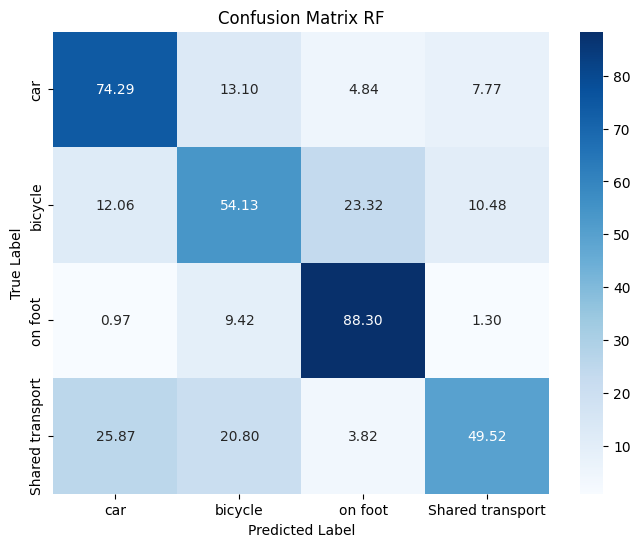

In [272]:
class_labels = ["car", "bicycle", "on foot", "Shared transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

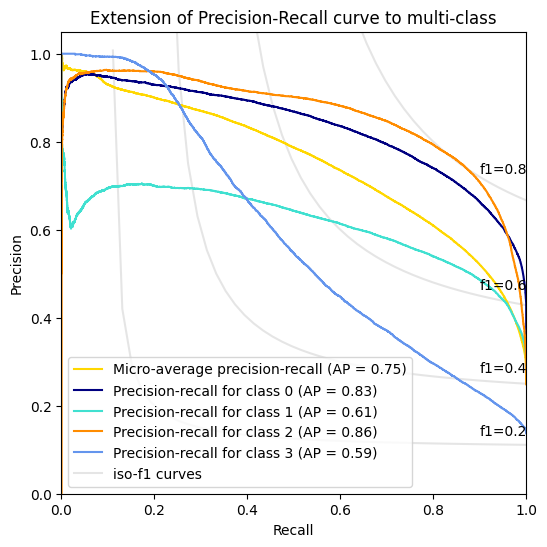

In [273]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# Decision Tree

In [274]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=13)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76     51967
           1       0.65      0.66      0.65     46681
           2       0.80      0.85      0.82     39904
           3       0.57      0.59      0.58     21962

    accuracy                           0.72    160514
   macro avg       0.70      0.71      0.70    160514
weighted avg       0.72      0.72      0.72    160514



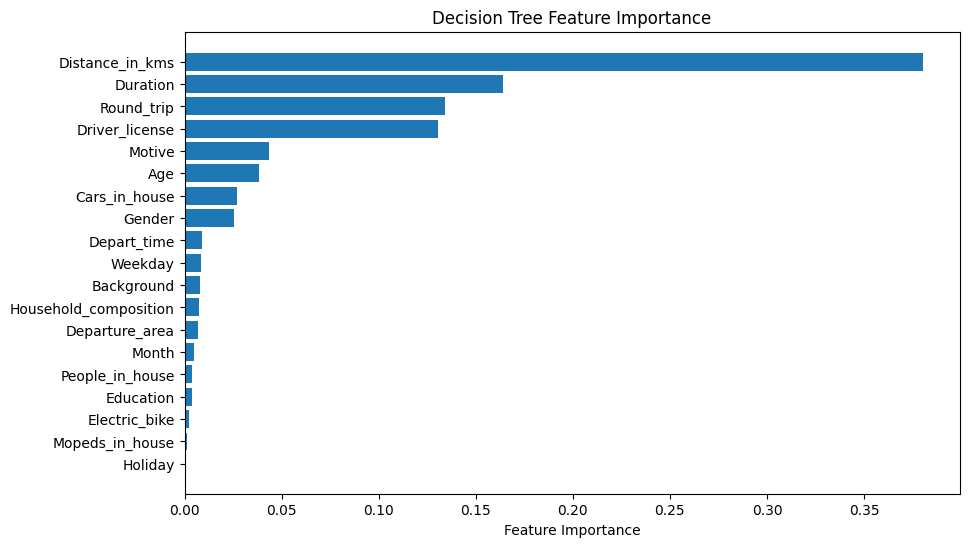

In [275]:
feature_importances = tree.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

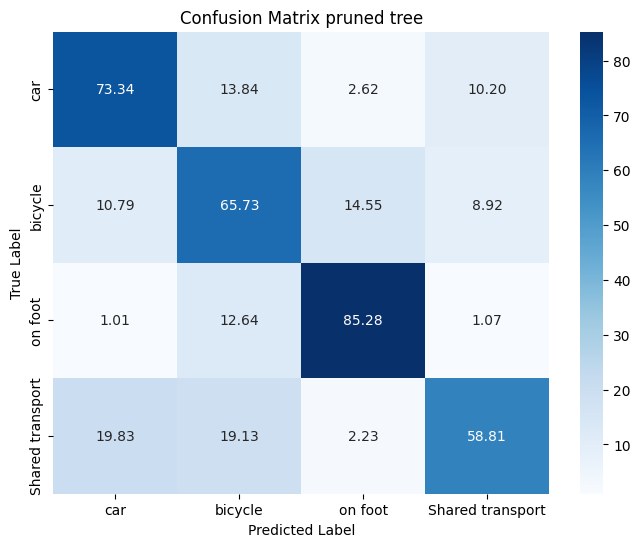

In [276]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

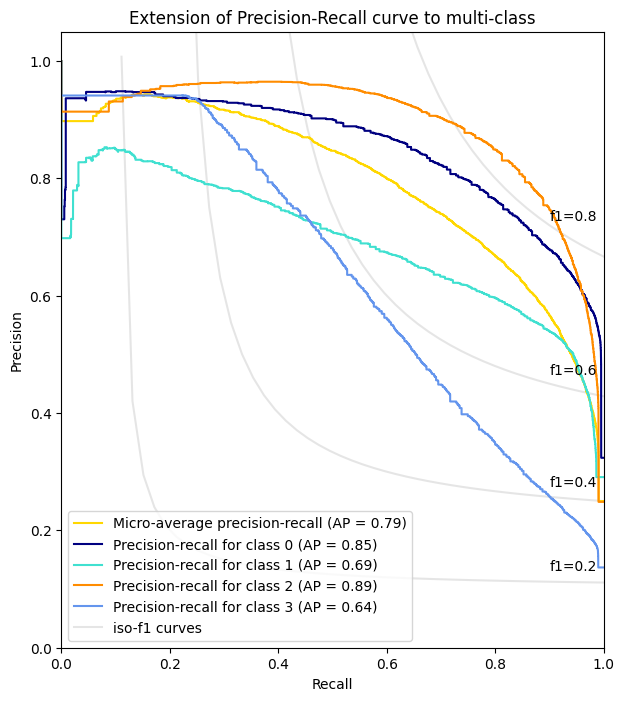

In [277]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(tree.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(tree.classes_)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# Random Forest

In [243]:
random_forest = RandomForestClassifier(random_state=42, max_features=4, n_estimators=450)
random_forest.fit(X_train, y_train)
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     51967
           1       0.77      0.74      0.76     46681
           2       0.84      0.90      0.87     39904
           3       0.70      0.73      0.71     21962

    accuracy                           0.81    160514
   macro avg       0.79      0.80      0.79    160514
weighted avg       0.81      0.81      0.80    160514



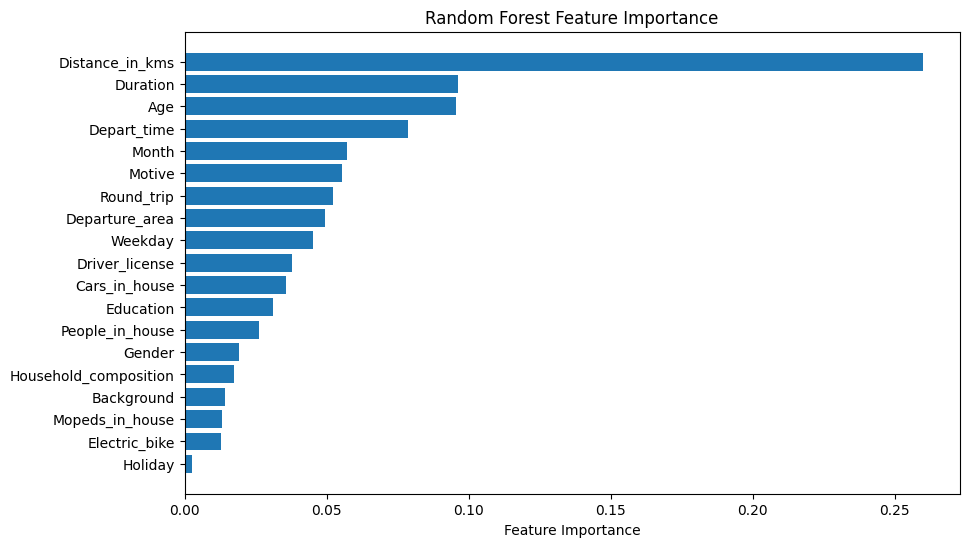

In [244]:
feature_importances = random_forest.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

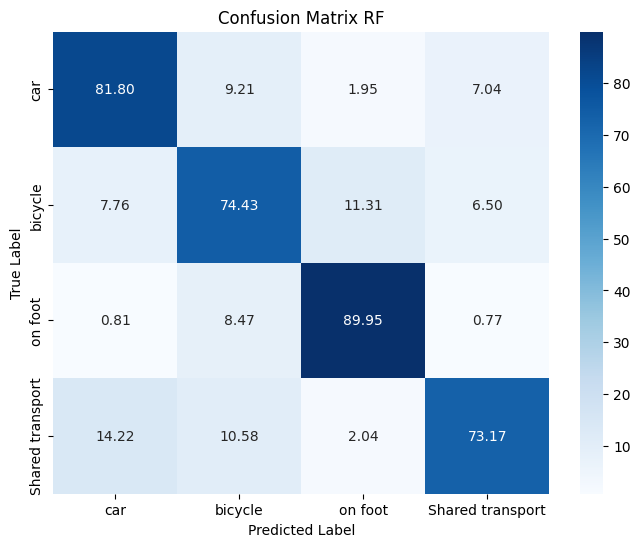

In [245]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

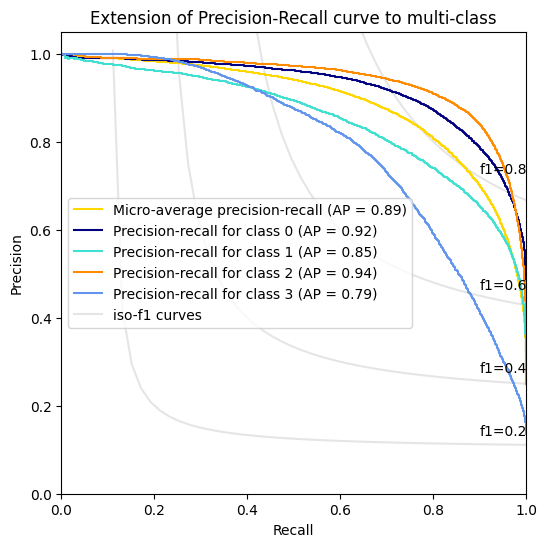

In [246]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(random_forest.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()